# **Projet Modèles à équations structurelles**

### **Importation des packages python**

In [0]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Load in the r magic
%reload_ext rpy2.ipython
%config IPCompleter.greedy=True
%config InlineBackend.figure_format = 'retina'

### **Importation des package R**

Tous les codes précédés de %%R sont des codes R. Sinon du code Python. 

In [0]:
%%R 
install.packages("plspm")
install.packages("readxl")
install.packages("dplyr")
install.packages("lavaan")
install.packages("ppcor")
install.packages("shape")
install.packages("diagram")
install.packages("pbivnorm")
install.packages("mnormt")
install.packages("tester")
install.packages("turner")
install.packages("amap")
install.packages("igraph")
install.packages("ClustVarLV")
install.packages("factoextra")
library(factoextra)
library(ppcor)
library(shape)
library(diagram)
library(pbivnorm)
library(mnormt)
library(tester)
library(turner)
library(amap)
library(igraph)
library(ClustVarLV)
library(lavaan)
library(plspm)
library(readxl)
library(dplyr)

#### **importation de la base de données**


In [0]:
from google.colab import files
uploaded = files.upload()

Saving mobil_init.txt to mobil_init.txt


In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['mobil_init.txt']), sep="\t")
data.head()

,id,CUEX1,CUEX2,CUEX3,PERQ1,PERQ2,PERQ3,PERQ4,PERQ5,PERQ6,PERQ7,PERV1,PERV2,CUSA1,CUSA2,CUSA3,CUSL1,CUSL2,CUSL3
0,1,6,6,5,6,5,2,6,5,3,3,0,1,5,2,6,5,3,5
1,2,9,9,8,9,8,9,9,8,9,9,9,9,9,9,7,9,0,9
2,3,6,6,6,6,7,3,6,7,6,6,6,6,7,6,6,5,0,6
3,4,6,9,3,7,9,9,7,2,3,7,3,3,9,9,9,9,2,9
4,5,7,6,9,9,8,7,9,8,8,7,5,5,9,7,7,9,1,7


In [0]:
data.shape

(250, 19)

#### **Question 1 : exploration des données**

In [0]:
data = data.drop("id", axis=1)
data.describe()

,CUEX1,CUEX2,CUEX3,PERQ1,PERQ2,PERQ3,PERQ4,PERQ5,PERQ6,PERQ7,PERV1,PERV2,CUSA1,CUSA2,CUSA3,CUSL1,CUSL2,CUSL3
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,6.468000,6.432000,6.260000,6.888000,6.024000,6.580000,6.832000,6.804000,6.692000,6.464000,4.796000,5.724000,6.952000,5.956000,6.180000,6.288000,3.444000,6.520000
std,1.845698,1.979152,2.350852,1.571411,2.169389,2.064132,1.850805,1.624852,1.811702,2.090499,2.522665,2.109413,1.334473,2.040273,1.988824,2.882759,3.207494,2.444895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,6.000000,5.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,5.000000,6.000000,5.000000,6.000000,5.000000,1.000000,6.000000
50%,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,6.000000,7.000000,6.000000,6.000000,7.000000,2.000000,7.000000
75%,7.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,7.000000,8.000000,7.000000,7.000000,9.000000,5.750000,9.000000
max,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [0]:
data.columns

Index(['CUEX1', 'CUEX2', 'CUEX3', 'PERQ1', 'PERQ2', 'PERQ3', 'PERQ4', 'PERQ5',
       'PERQ6', 'PERQ7', 'PERV1', 'PERV2', 'CUSA1', 'CUSA2', 'CUSA3', 'CUSL1',
       'CUSL2', 'CUSL3'],
      dtype='object')

In [0]:
for col in data.columns:
  num_nan = data.loc[(pd.isna(data[col])), col].shape[0]
  print(f"There are {num_nan} NaNs in column {col}")

There are 0 NaNs in column CUEX1
There are 0 NaNs in column CUEX2
There are 0 NaNs in column CUEX3
There are 0 NaNs in column PERQ1
There are 0 NaNs in column PERQ2
There are 0 NaNs in column PERQ3
There are 0 NaNs in column PERQ4
There are 0 NaNs in column PERQ5
There are 0 NaNs in column PERQ6
There are 0 NaNs in column PERQ7
There are 0 NaNs in column PERV1
There are 0 NaNs in column PERV2
There are 0 NaNs in column CUSA1
There are 0 NaNs in column CUSA2
There are 0 NaNs in column CUSA3
There are 0 NaNs in column CUSL1
There are 0 NaNs in column CUSL2
There are 0 NaNs in column CUSL3


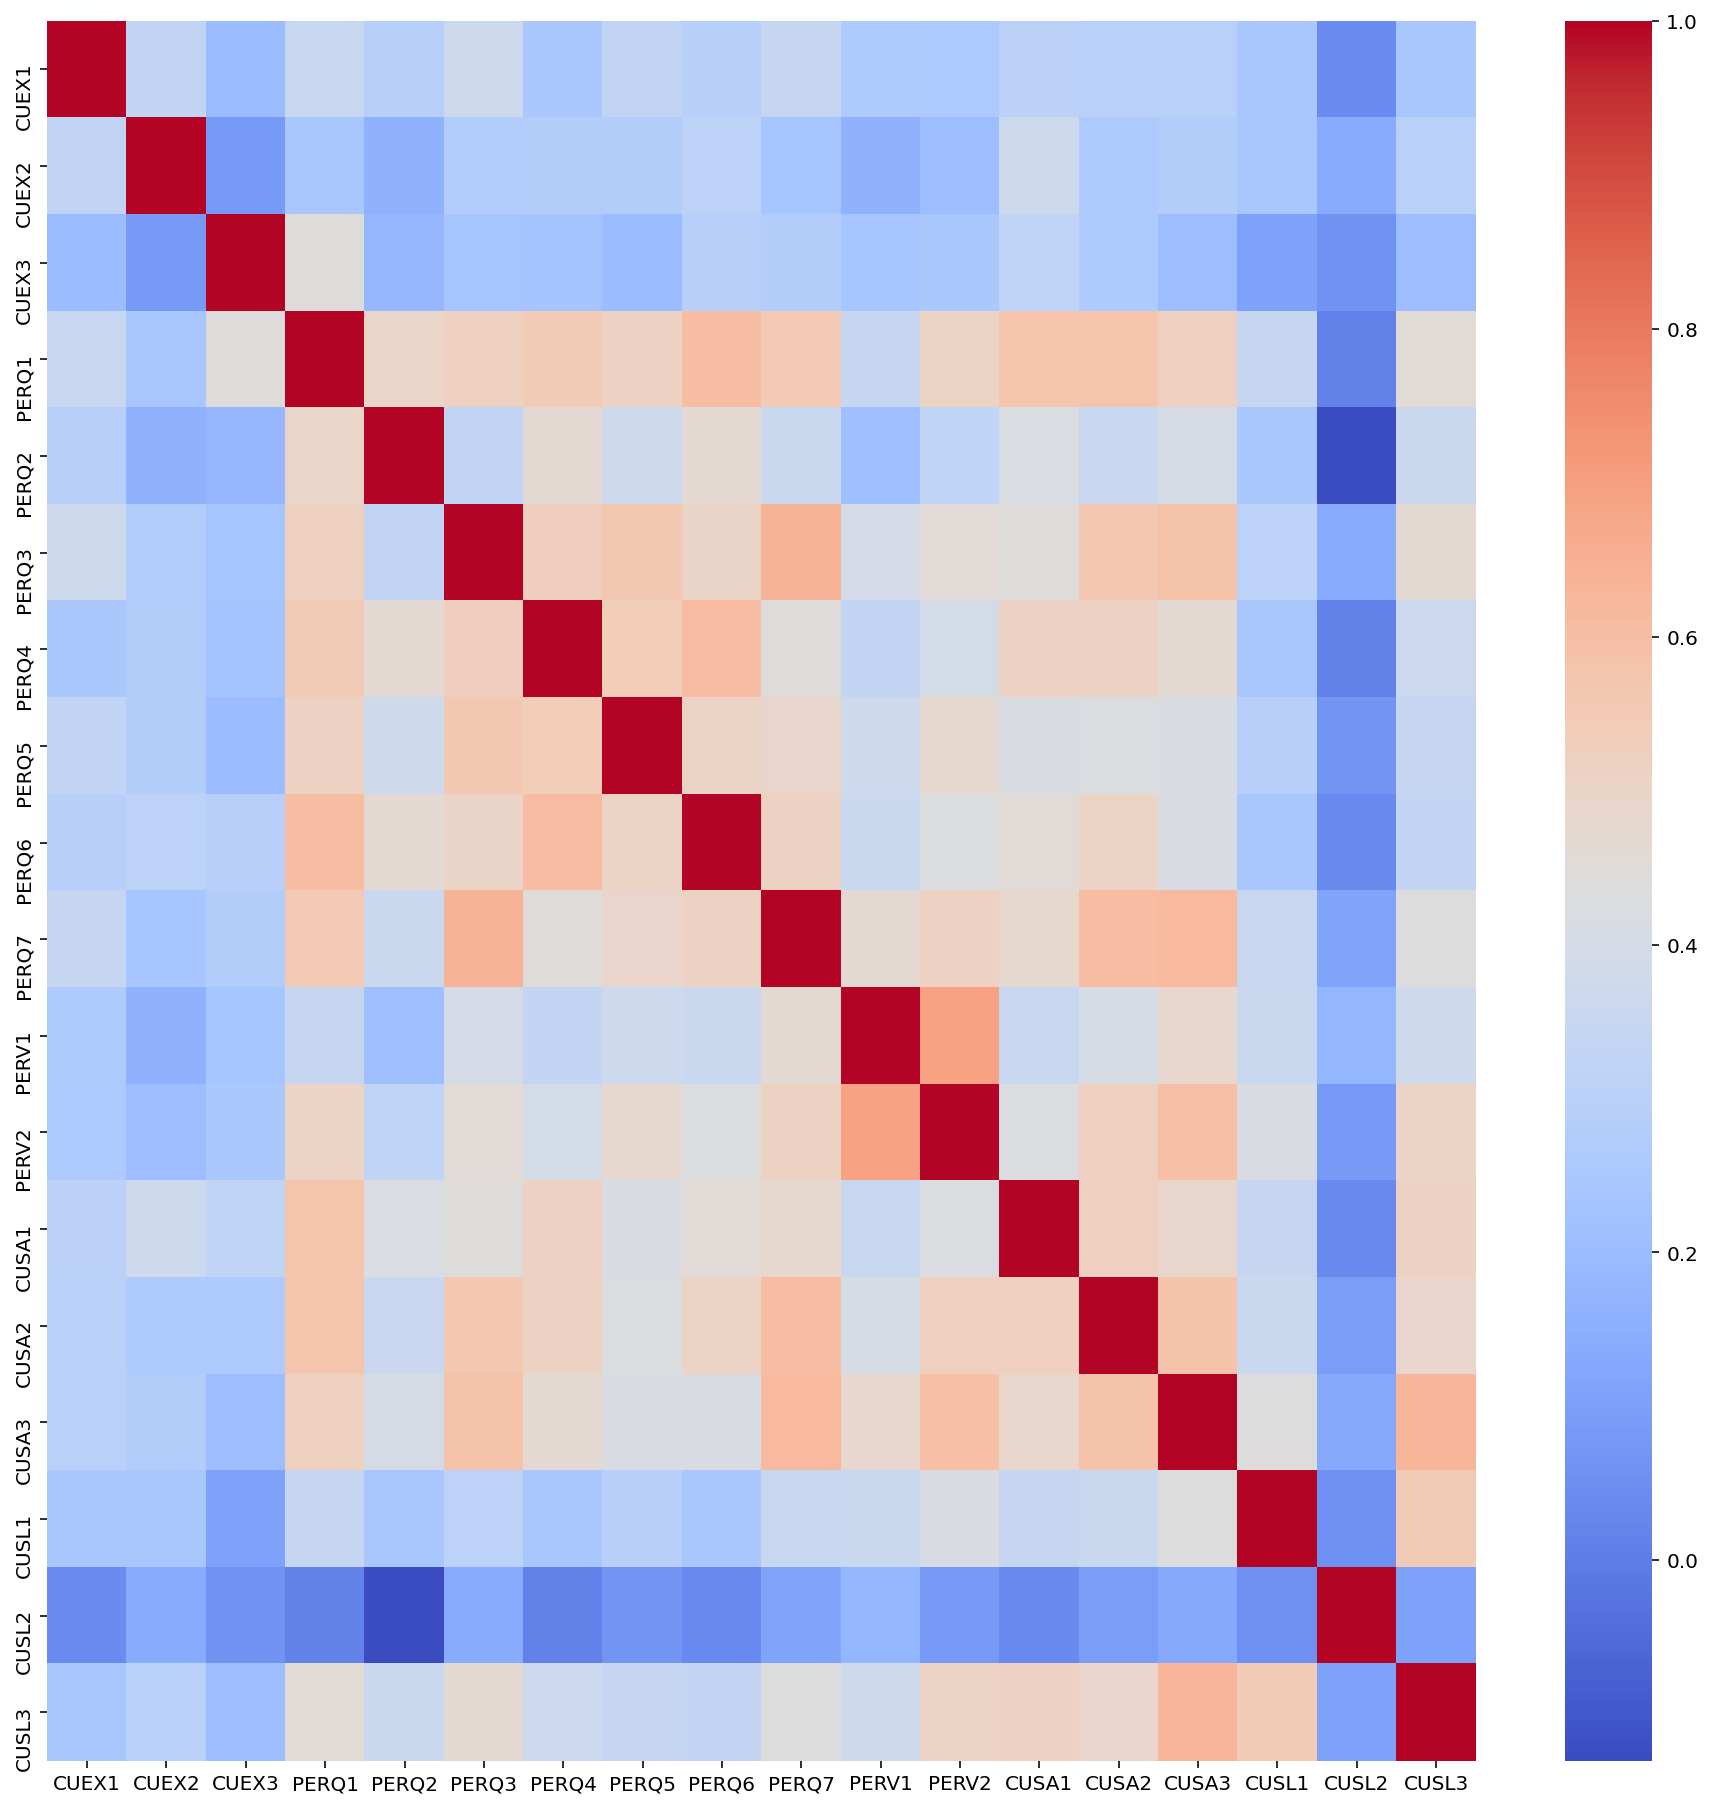

In [0]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(), cmap="coolwarm")

#### **Importation sur R**


In [0]:
%%R
df <- read.table("mobil_init.txt",header=TRUE)
df = df[,2:19]
head(df)

  CUEX1 CUEX2 CUEX3 PERQ1 PERQ2 PERQ3 PERQ4 PERQ5 PERQ6 PERQ7 PERV1 PERV2 CUSA1
1     6     6     5     6     5     2     6     5     3     3     0     1     5
2     9     9     8     9     8     9     9     8     9     9     9     9     9
3     6     6     6     6     7     3     6     7     6     6     6     6     7
4     6     9     3     7     9     9     7     2     3     7     3     3     9
5     7     6     9     9     8     7     9     8     8     7     5     5     9
6     9     8     6     8     9     8     9     7     8     8     9     9     7
  CUSA2 CUSA3 CUSL1 CUSL2 CUSL3
1     2     6     5     3     5
2     9     7     9     0     9
3     6     6     5     0     6
4     9     9     9     2     9
5     7     7     9     1     7
6     6     6     9     1     9


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

From cffi callback <function _processevents at 0x7fbabb58f268>:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/rpy2/rinterface_lib/callbacks.py", line 262, in _proc

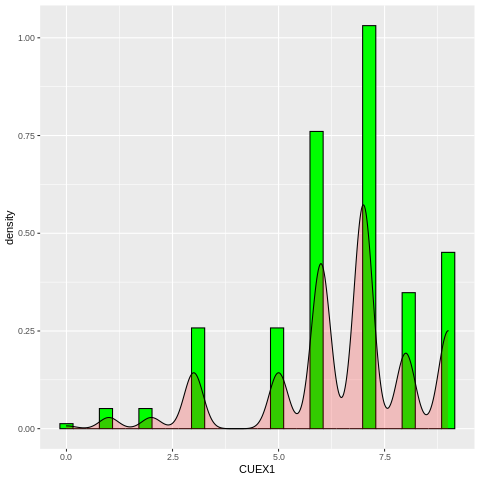

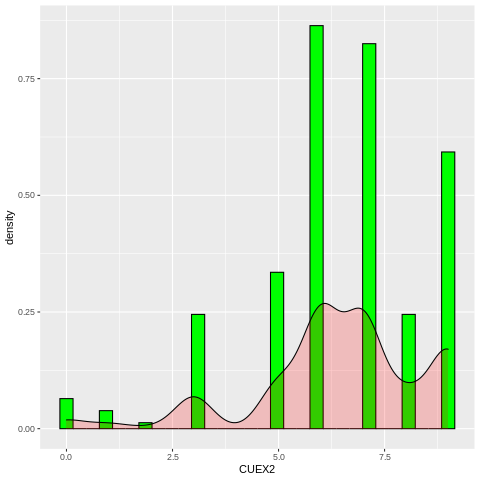

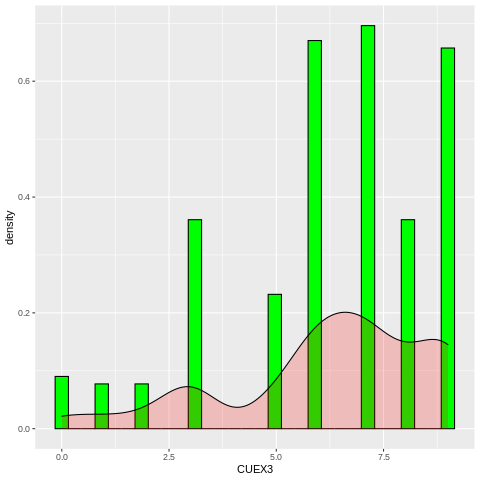

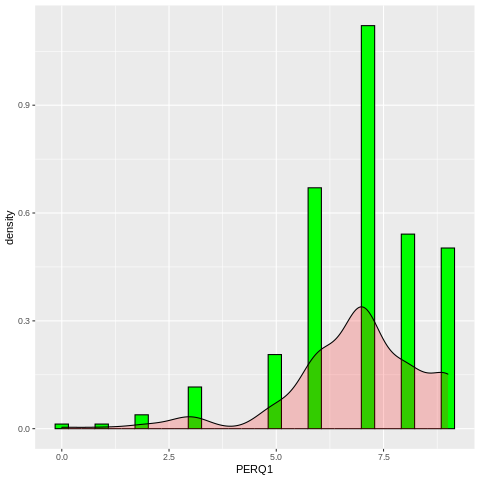

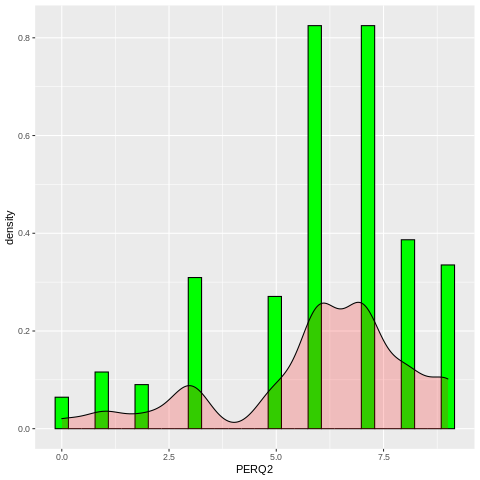

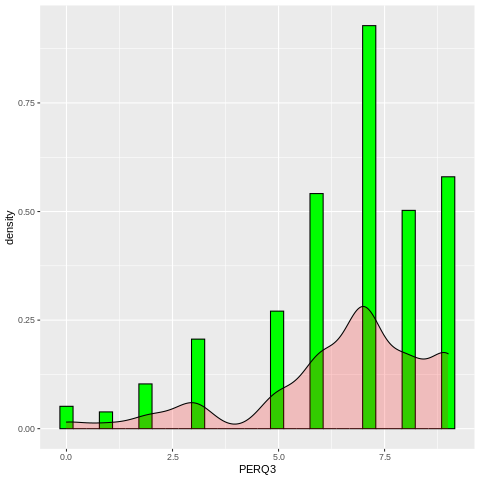

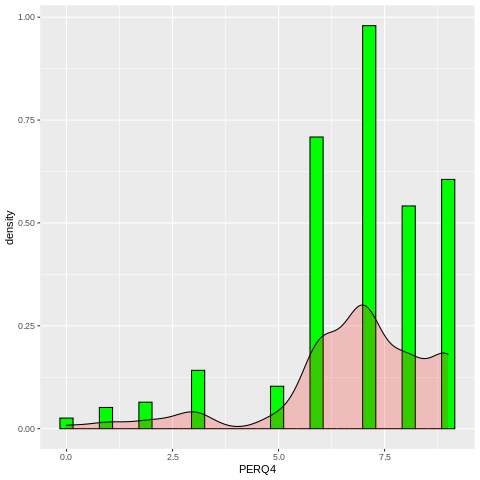

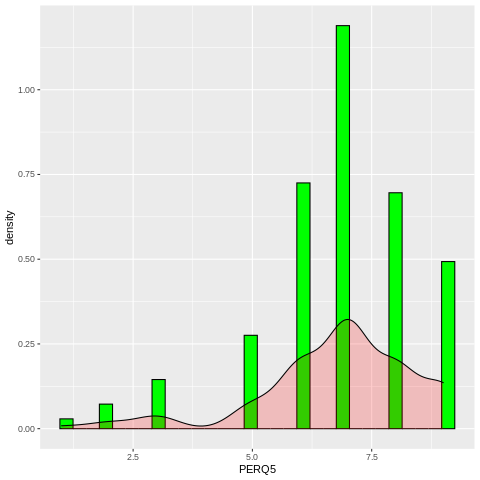

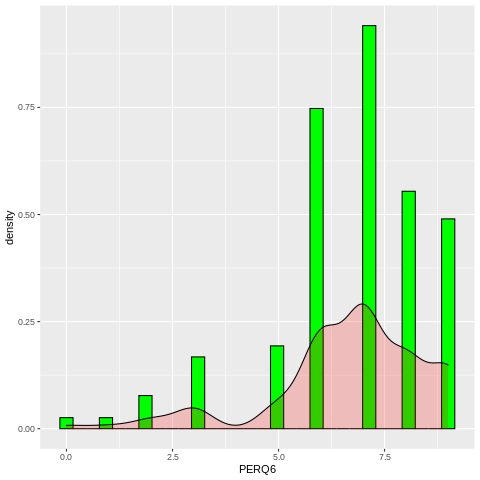

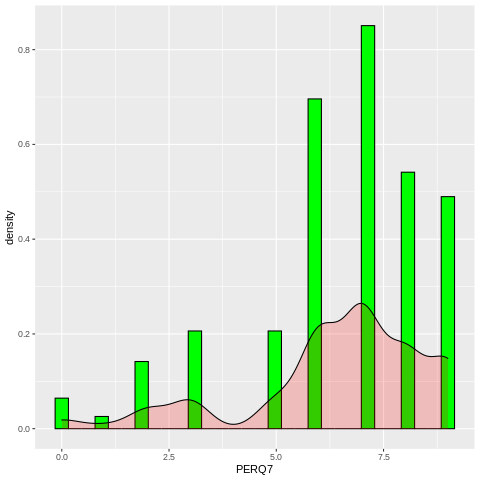

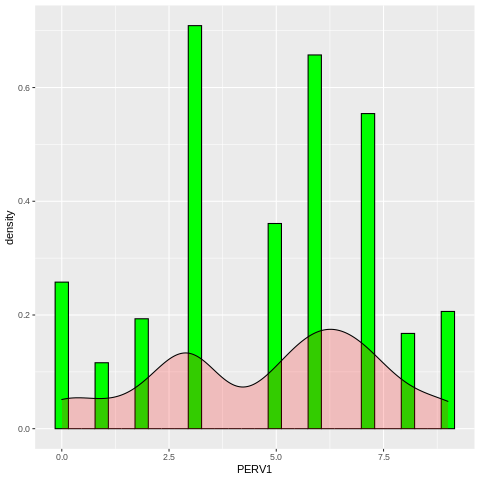

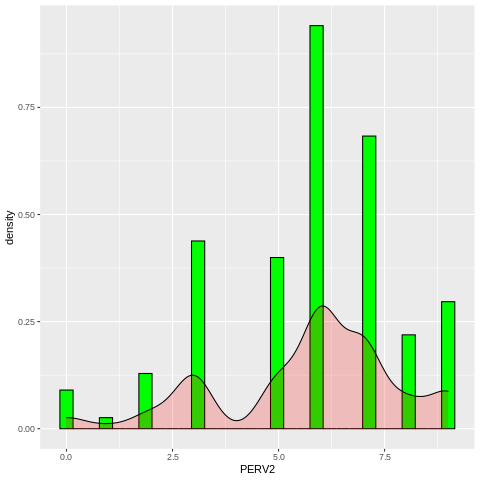

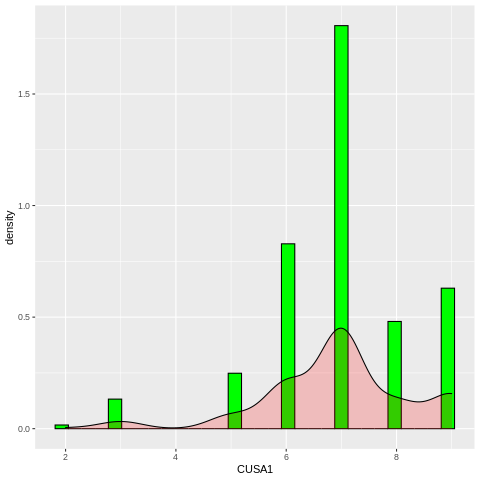

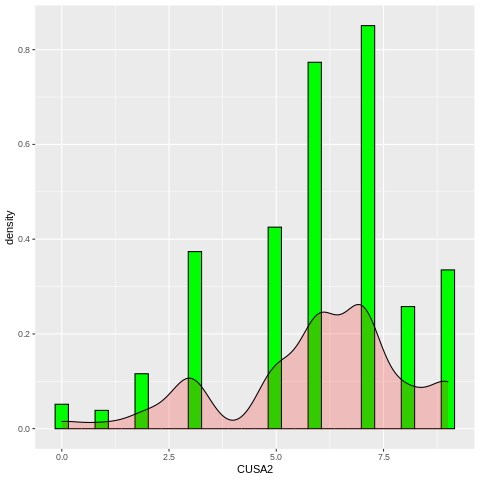

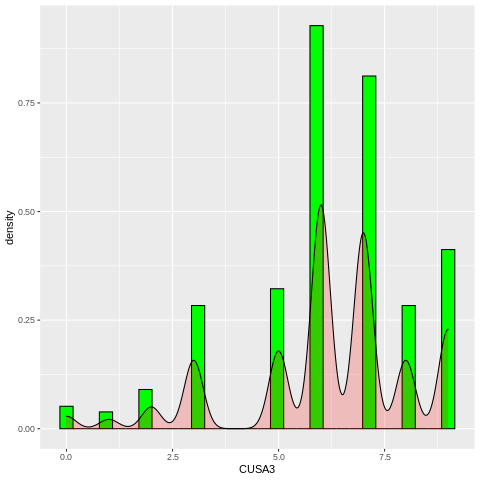

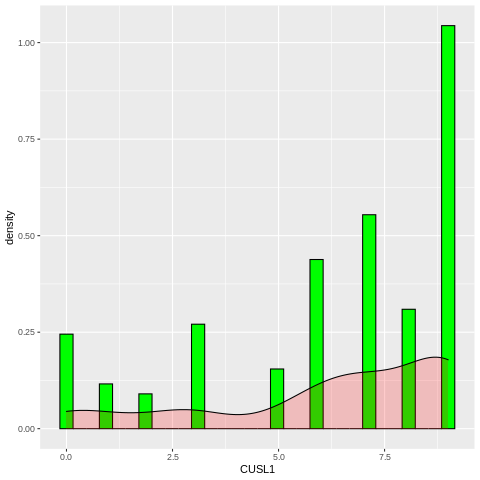

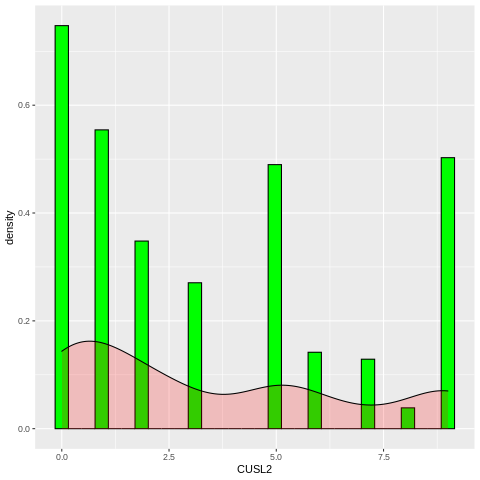

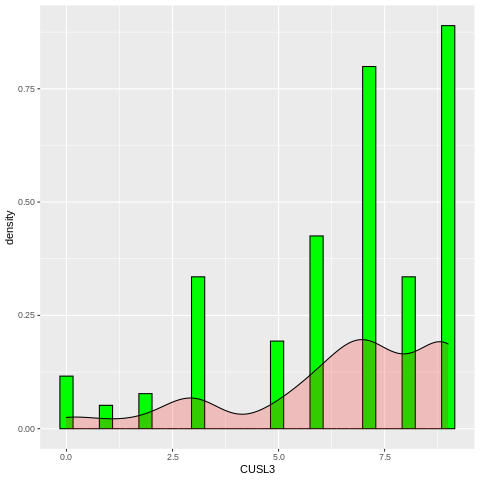

In [0]:
%%R
library(ggplot2)
nm <- names(df)
for(i in nm){
 print(ggplot(df, aes(x=df[,i])) + 
    geom_histogram(aes(y=..density..), colour="black", fill="green") +
      xlab(i) +
      geom_density(alpha=.2, fill="red")) 
}

#### **Question 3: Unidimensionalité des blocs** 

In [0]:
%%R

unidim_new = function(df,name_blocks,alpha)
            {n=nrow(df)
             res_unidim <- unidim(df,blocks = name_blocks)
             seuil <- matrix(0,nrow=nrow(res_unidim))
             pval <- matrix(0,nrow=nrow(res_unidim))
             for (k in 1:nrow(res_unidim))
                 {seuil[k]=1+qnorm(1-alpha/2)*sqrt((res_unidim[k,2]-1)/(n-1))
                  pval[k]=1-pnorm((res_unidim[k,6]-1)/sqrt((res_unidim[k,2]-1)/(n-1)),0,1)}
             out_unidim <- data.frame(res_unidim,seuil,pval)
             print(out_unidim)
            }

sat_blocks = list(1:3, 4:10, 11:12, 13:15, 16:18)
unidim_new(df,sat_blocks,alpha=0.05)

   Block MVs   C.alpha    DG.rho  eig.1st   eig.2nd    seuil      pval
1 block1   3 0.4350998 0.7250481 1.425152 0.9247435 1.175656 0.7994642
2 block2   7 0.8763201 0.9045427 4.033589 0.7850608 1.304245 0.9169201
3 block3   2 0.8174469 0.9163580 1.691256 0.3087440 1.124208 1.0000000
4 block4   3 0.7728313 0.8685839 2.063850 0.5256004 1.175656 0.9999999
5 block5   3 0.4801222 0.7329279 1.568738 0.9799160 1.175656 0.5886590


#### **Question 4: Approche LISREL**

In [0]:
%%R

model <- '
# Modèle de mesure
customer_expectation =~ CUEX1 + CUEX2 + CUEX3
perceived_quality =~ PERQ1 + PERQ2 + PERQ3 + PERQ4 + PERQ5 + PERQ6 + PERQ7
perceived_value =~ PERV1 + PERV2
customer_satisfaction =~ CUSA1 + CUSA2 + CUSA3
customer_loyalty =~ CUSL1 + CUSL2 + CUSL3
# Modèle de structure
perceived_quality ~ customer_expectation
customer_loyalty ~ customer_satisfaction 
perceived_value ~ customer_expectation + perceived_quality
customer_satisfaction ~ perceived_value + perceived_quality + customer_expectation
'

fit <- sem(model, data = df) 
summary(fit, standardized = TRUE, fit.measures=TRUE)

modindices(fit, minimum.value = 10, sort = TRUE)

#lavResiduals(fit)

lavaan 0.6-5 ended normally after 68 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of free parameters                         43
                                                      
  Number of observations                           250
                                                      
Model Test User Model:
                                                      
  Test statistic                               267.792
  Degrees of freedom                               128
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                              2090.366
  Degrees of freedom                               153
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.928
  Tucker-Lewis Index (TLI)                       0.914

Loglikelihood and Information Criteri

In [0]:
%%R
fitMeasures(fit, c("GFI", "AGFI", "RMSEA", "NFI", "NNFI", "CFI", "RNI", "IFI", "SRMR", "AIC", "AICc", "BIC", "CAIC"))

      gfi      agfi     rmsea       nfi      nnfi       cfi       rni       ifi 
    0.889     0.852     0.066     0.872     0.914     0.928     0.928     0.929 
     srmr       aic       bic 
    0.050 17522.472 17673.895 


#### **Question 6: Utilisation du package plspm pour ajuster le modèle PLS**

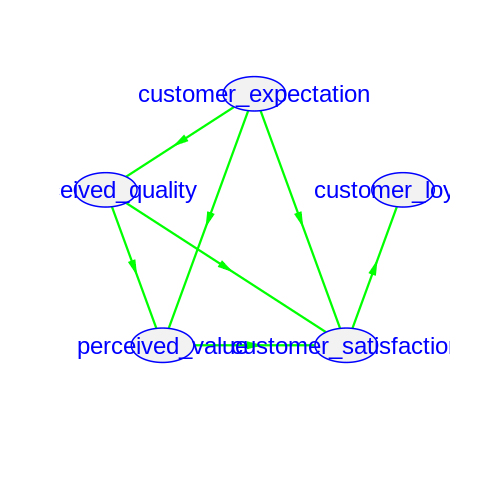

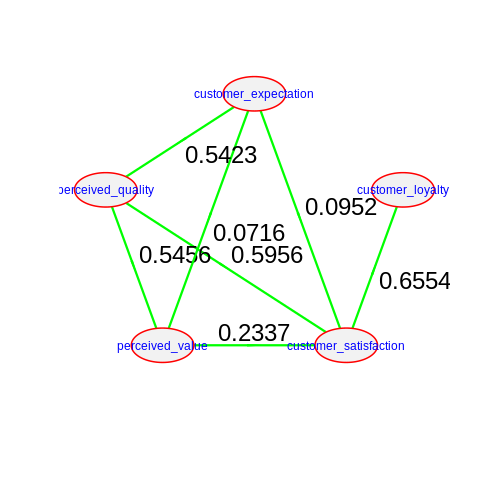

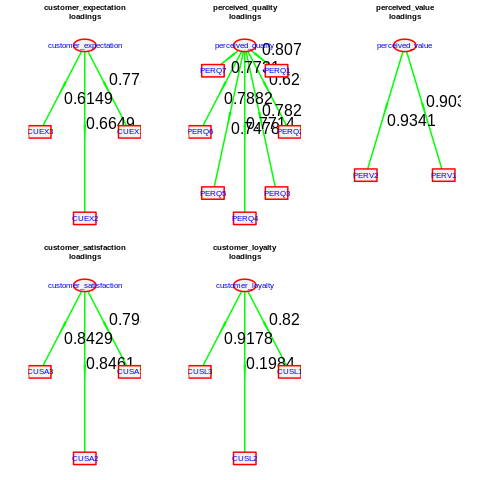

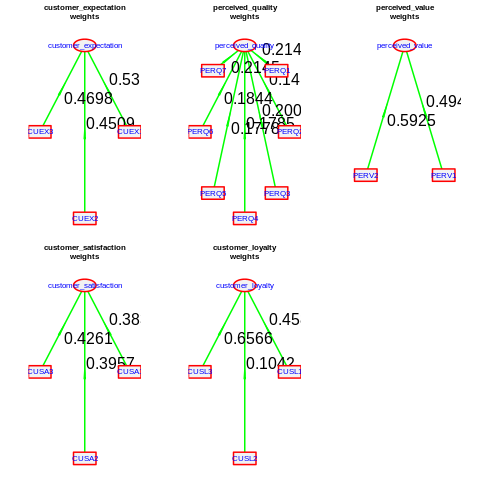

In [0]:
%%R
# path matrix
customer_expectation = c(0,0,0,0,0)
perceived_quality = c(1,0,0,0,0)
perceived_value = c(1,1,0,0,0)
customer_satisfaction = c(1,1,1,0,0)
customer_loyalty = c(0,0,0,1,0)

sat_path = rbind(customer_expectation, perceived_quality, perceived_value, customer_satisfaction, customer_loyalty)

# plot diagram of path matrix
innerplot(sat_path,box.cex=2,txt.col="blue",lcol="blue",colpos="green",colneg="orange")

# blocks of outer model
sat_blocks = list(1:3, 4:10, 11:12, 13:15, 16:18)

# vector of modes (reflective indicators)
sat_mod = rep("A", 5)

# apply plspm
satpls = plspm(df, sat_path, sat_blocks, modes = sat_mod, scaled = FALSE)
satpls = plspm(df, sat_path, sat_blocks, modes = sat_mod, scaled = TRUE)
satpls = plspm(df, sat_path, sat_blocks, modes = sat_mod, scaled = TRUE, boot.val=TRUE, br=100)

# plot diagram of the inner model
innerplot(satpls,box.cex=1,txt.col="blue", arr.width=0.05,lcol="red",colpos="green",colneg="orange",cex.txt=2)

# plot loadings
outerplot(satpls,box.size=0.1,box.cex=1, arr.width=0.05,txt.col="blue",lcol="red",colpos="green",colneg="orange",cex.txt=2,what = "loadings")

# plot outer weights
outerplot(satpls,box.size=0.1,box.cex=1, arr.width=0.05,txt.col="blue",lcol="red",colpos="green",colneg="orange",cex.txt=2,what = "weights")

In [0]:
%%R
summary(satpls)

PARTIAL LEAST SQUARES PATH MODELING (PLS-PM) 

---------------------------------------------------------- 
MODEL SPECIFICATION 
1   Number of Cases      250 
2   Latent Variables     5 
3   Manifest Variables   18 
4   Scale of Data        Standardized Data 
5   Non-Metric PLS       FALSE 
6   Weighting Scheme     centroid 
7   Tolerance Crit       1e-06 
8   Max Num Iters        100 
9   Convergence Iters    3 
10  Bootstrapping        TRUE 
11  Bootstrap samples    100 

---------------------------------------------------------- 
BLOCKS DEFINITION 
                    Block         Type   Size   Mode
1    customer_expectation    Exogenous      3      A
2       perceived_quality   Endogenous      7      A
3         perceived_value   Endogenous      2      A
4   customer_satisfaction   Endogenous      3      A
5        customer_loyalty   Endogenous      3      A

---------------------------------------------------------- 
BLOCKS UNIDIMENSIONALITY 
                       Mode  MVs  C.al

#### **Question 7: Approche RFPC** 

In [0]:
%%R

rfpc = function(data, begin,end)
    {n = nrow(df)
    bloc_ <- as.matrix(data.frame(df[,begin:end]))
    qbloc = ncol(bloc_)
    bloc_std <- matrix(0, nrow=n, ncol=qbloc)
    
    for (j in 1:qbloc)
    {X_bis <- as.matrix(data.frame(bloc_[,j]))
    bloc_std[,j] <- (X_bis-apply(X_bis,2,mean,na.rm=TRUE))/apply(X_bis,2,sd,na.rm=TRUE)
    }
    
    cor_ <- cor(bloc_)
    pca_ <- eigen(cor_)
    
    res.pca <- prcomp(bloc_, scale = TRUE)
    var_ <- get_pca_var(res.pca)
    print("les loadings:")
    loadings = var_$cor[,1]
    print(loadings)
    
    print("les weights:")
    weigths = loadings / get_eigenvalue(res.pca)[,1][1]
    print(weigths)

    print("les communality:")
    communality = loadings**2
    print(communality)

    v_ <- as.matrix(pca_$vectors)
    bloc_std <- as.matrix(bloc_std)
    z_ <- bloc_std%*%v_[,1]
    ret_ <- list("composante"= -z_, "valeur_propre" = pca_$values[1])
    return (ret_)
    }

# Calcul des 1 ère CP pour chaque bloc 

customer_expectation = rfpc(df, 1,3)
perceived_quality = rfpc(df, 4,10)
perceived_value  = rfpc(df, 11,12)
customer_satisfaction = rfpc(df, 13,15)
customer_loyalty = rfpc(df, 16,18)


[1] "les loadings:"
    CUEX1     CUEX2     CUEX3 
0.7983776 0.7187021 0.5207806 
[1] "les weights:"
    CUEX1     CUEX2     CUEX3 
0.5602053 0.5042986 0.3654211 
[1] "les communality:"
    CUEX1     CUEX2     CUEX3 
0.6374068 0.5165328 0.2712124 
[1] "les loadings:"
    PERQ1     PERQ2     PERQ3     PERQ4     PERQ5     PERQ6     PERQ7 
0.8021716 0.6407763 0.7730686 0.7825589 0.7517593 0.7954378 0.7560548 
[1] "les weights:"
    PERQ1     PERQ2     PERQ3     PERQ4     PERQ5     PERQ6     PERQ7 
0.1988729 0.1588601 0.1916577 0.1940106 0.1863748 0.1972035 0.1874397 
[1] "les communality:"
    PERQ1     PERQ2     PERQ3     PERQ4     PERQ5     PERQ6     PERQ7 
0.6434792 0.4105942 0.5976350 0.6123985 0.5651420 0.6327214 0.5716188 
[1] "les loadings:"
    PERV1     PERV2 
0.9195803 0.9195803 
[1] "les weights:"
    PERV1     PERV2 
0.5437263 0.5437263 
[1] "les communality:"
   PERV1    PERV2 
0.845628 0.845628 
[1] "les loadings:"
    CUSA1     CUSA2     CUSA3 
0.8011009 0.8532247 0.8331239

##### **RFPC pour perceived_quality**



In [0]:
%%R  
reg_4 = lm(perceived_quality$composante ~ customer_expectation$composante)
print(summary(reg_4))
print(mean(reg_4$residuals^2))


Call:
lm(formula = perceived_quality$composante ~ customer_expectation$composante)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5382 -0.6965  0.2750  1.0270  4.2553 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     -9.927e-17  1.077e-01   0.000        1    
customer_expectation$composante  8.961e-01  9.041e-02   9.912   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.703 on 248 degrees of freedom
Multiple R-squared:  0.2837,	Adjusted R-squared:  0.2808 
F-statistic: 98.24 on 1 and 248 DF,  p-value: < 2.2e-16

[1] 2.877582


##### **RFPC pour customer_loyalty**

In [0]:
%%R
reg_1 = lm(customer_loyalty$composante ~ customer_satisfaction$composante + -1)
print(summary(reg_1))
print(mean(reg_1$residuals^2))


Call:
lm(formula = customer_loyalty$composante ~ customer_satisfaction$composante + 
    -1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8100 -0.4607  0.1516  0.5720  3.1352 

Coefficients:
                                 Estimate Std. Error t value Pr(>|t|)    
customer_satisfaction$composante  -0.5533     0.0427  -12.96   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9679 on 249 degrees of freedom
Multiple R-squared:  0.4028,	Adjusted R-squared:  0.4004 
F-statistic:   168 on 1 and 249 DF,  p-value: < 2.2e-16

[1] 0.9330924


##### **RFPC pour perceived value**

In [0]:
%%R
reg_3 = lm(perceived_value$composante ~ customer_expectation$composante + perceived_quality$composante + -1) 
print(summary(reg_3))
print(mean(reg_3$residuals^2))


Call:
lm(formula = perceived_value$composante ~ customer_expectation$composante + 
    perceived_quality$composante + -1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.0172 -0.7287 -0.2089  0.7096  4.3219 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
customer_expectation$composante -0.07876    0.06672   -1.18    0.239    
perceived_quality$composante    -0.34701    0.03966   -8.75 3.34e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.064 on 248 degrees of freedom
Multiple R-squared:  0.3337,	Adjusted R-squared:  0.3283 
F-statistic:  62.1 on 2 and 248 DF,  p-value: < 2.2e-16

[1] 1.122384


##### **RFPC pour customer_satisfaction**

In [0]:
%%R
reg_2 = lm(customer_satisfaction$composante ~ perceived_value$composante + perceived_quality$composante + customer_expectation$composante + -1)
print(summary(reg_2))
print(mean(reg_2$residuals^2))


Call:
lm(formula = customer_satisfaction$composante ~ perceived_value$composante + 
    perceived_quality$composante + customer_expectation$composante + 
    -1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2926 -0.5208  0.0024  0.4491  2.9556 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
perceived_value$composante       0.25739    0.05071   5.076 7.58e-07 ***
perceived_quality$composante    -0.42185    0.03623 -11.644  < 2e-16 ***
customer_expectation$composante -0.12491    0.05343  -2.338   0.0202 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8494 on 247 degrees of freedom
Multiple R-squared:  0.6532,	Adjusted R-squared:  0.649 
F-statistic: 155.1 on 3 and 247 DF,  p-value: < 2.2e-16

[1] 0.7127922


#### **Question 10: Modèle libre**

###### **Suppression des variables CUEX3 et CUSL2**

In [0]:
%%R
df1 = select(df, -c("CUEX3", "CUSL2"))
head(df1)

  CUEX1 CUEX2 PERQ1 PERQ2 PERQ3 PERQ4 PERQ5 PERQ6 PERQ7 PERV1 PERV2 CUSA1 CUSA2
1     6     6     6     5     2     6     5     3     3     0     1     5     2
2     9     9     9     8     9     9     8     9     9     9     9     9     9
3     6     6     6     7     3     6     7     6     6     6     6     7     6
4     6     9     7     9     9     7     2     3     7     3     3     9     9
5     7     6     9     8     7     9     8     8     7     5     5     9     7
6     9     8     8     9     8     9     7     8     8     9     9     7     6
  CUSA3 CUSL1 CUSL3
1     6     5     5
2     7     9     9
3     6     5     6
4     9     9     9
5     7     9     7
6     6     9     9


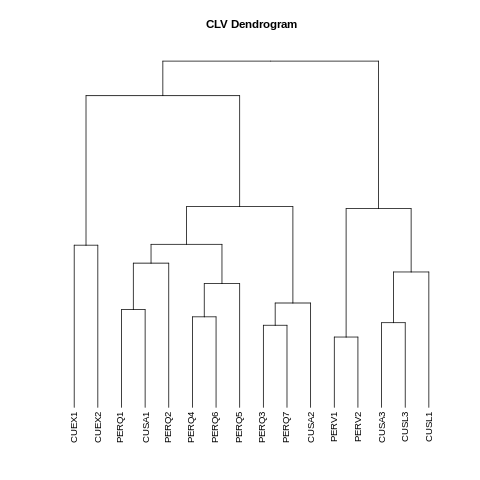

In [0]:
%%R

# Classification de variables avec le package ClusVarLV
res.CLV <- CLV(df1,method="local")

# Affiche les résultats : cela permet de choisir le nombre de classes : ncl
comp = res.CLV$partition5
res.CLV
plot(res.CLV,type="dendrogram")

p-value relatives aux corrélations partielles estimées:

             Comp1        Comp2        Comp3        Comp4        Comp5
Comp1 0.0000000000 6.376343e-04 1.653128e-01 7.640517e-01 5.801329e-02
Comp2 0.0006376343 0.000000e+00 5.212221e-16 4.554186e-02 2.317640e-02
Comp3 0.1653127912 5.212221e-16 0.000000e+00 7.692624e-04 4.864948e-06
Comp4 0.7640516631 4.554186e-02 7.692624e-04 0.000000e+00 4.702282e-07
Comp5 0.0580132880 2.317640e-02 4.864948e-06 4.702282e-07 0.000000e+00

corrélations partielles estimées:

            Comp1     Comp2      Comp3       Comp4     Comp5
Comp1  1.00000000 0.2158245 0.08855529 -0.01919462 0.1207847
Comp2  0.21582452 1.0000000 0.48546033  0.12735991 0.1444436
Comp3  0.08855529 0.4854603 1.00000000  0.21264793 0.2861628
Comp4 -0.01919462 0.1273599 0.21264793  1.00000000 0.3140130
Comp5  0.12078472 0.1444436 0.28616284  0.31401298 1.0000000


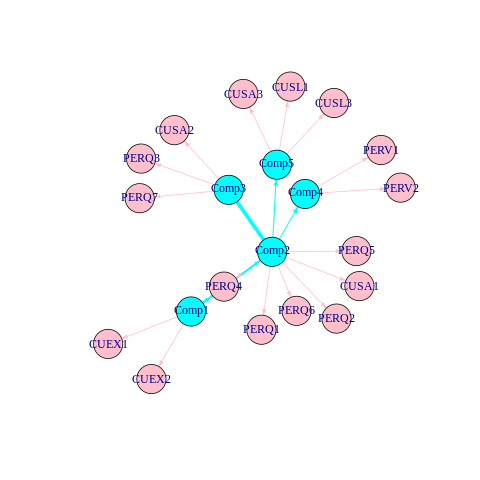

In [0]:
%%R

free_model <- function(data,res_CLV,ncl,alpha,w_link,s_vertex){
  
  # Calcul le nombre d'observations et le nombre de variables
  p=ncol(data)
  n=nrow(data)
  
  # Sélectionne la première composante principale de chacun des "ncl" groupes
  pc_ncl <- res_CLV[ncl]$partition$comp
  pc_ncl <- data.frame(pc_ncl)
  
  # Calcul des coefficients de corrélations partielles entre les premières composantes principales (variables latentes) 
  res.pcor <- pcor(pc_ncl)
  sat_path <- res.pcor$p.value
  cat("p-value relatives aux corrélations partielles estimées:\n\n")
  print(sat_path)
  width_path <- res.pcor$estimate
  #print()
  cat("\ncorrélations partielles estimées:\n\n")
  print(width_path)
  for (i in 1:ncl)
  {for (j in 1:ncl)
  {if (i != j)
  {if (sat_path[i,j] < alpha) {sat_path[i,j]=1
  width_path[i,j]=abs(width_path[i,j])*w_link}
    else {sat_path[i,j]=0}
  }
  }
  }
  
  
  # Contruction du graphe entre les variables manifestes et les variables latentes (modèle de mesure ou externe), et entre les variables latentes (modèle de structure ou interne)
  x <- res.CLV[ncl]$partition$clusters[2,]
  freq <- table(res.CLV[ncl]$partition$clusters)
  nom_var <- names(x)
  for (k in 1:ncl)
  {j=0
  name_var_bis <- matrix(0,nrow=freq[k]/2)
  for (i in 1:p)
  {if (x[i] == k) {j=j+1
  name_var_bis[j]=nom_var[i]
  }
  }
  if (k ==1) {name_var <- name_var_bis}
  else {name_var <- rbind(name_var,name_var_bis)}
  }
  
  WIDTH_VERTEX <- matrix(1,nrow=p)
  for (k in 1:ncl)
  {nb_var <- freq[k]/2
  num <- as.character(k)
  comp <- paste0("Comp",num)
  name_comp <- matrix(comp,nrow=nb_var)
  if (k == 1) {ORIGINE <- name_comp
  deb=1
  fin=nb_var
  DEST <- name_var[1:fin]
  DEST <- as.matrix(DEST)
  ID <- name_var[1:fin]
  ID <- as.matrix(ID)
  }
  else {ORIGINE <- rbind(ORIGINE,name_comp)
  deb=fin+1
  fin=fin+nb_var
  DEST_bis <- name_var[deb:fin]
  DEST_bis <- as.matrix(DEST_bis)
  DEST <- rbind(DEST,DEST_bis)
  ID <- rbind(ID,DEST_bis)
  }
  }
  for (i in 1:ncl)
  {for (j in 1:ncl)
  {if (sat_path[i,j] == 1) {num_a <- as.character(i)
  comp_a <- paste0("Comp",num_a)
  comp_a <- as.matrix(comp_a)
  ORIGINE <- rbind(ORIGINE,comp_a)
  num_b <- as.character(j)
  comp_b <- paste0("Comp",num_b)
  comp_b <- as.matrix(comp_b)
  DEST <- rbind(DEST,comp_b) 
  width_comp <- width_path[i,j]
  width_comp <- as.matrix(width_comp)
  WIDTH_VERTEX <- rbind(WIDTH_VERTEX,width_comp)
  }
  }
  }
  ORIGINE <- data.frame(ORIGINE)
  DEST <- data.frame(DEST)
  #WIDTH_VERTEX <- matrix(w_link,nrow=nrow(ORIGINE))
  link <- data.frame(ORIGINE,DEST,WIDTH_VERTEX)
  
  for (k in 1:ncl)
  {num <- as.character(k)
  if (k ==1) {comp <- as.matrix(paste0("Comp",num))}
  else {comp_bis  <- as.matrix(paste0("Comp",num))
  comp <- rbind(comp,comp_bis)
  }
  }
  COL <- matrix(1,nrow=p)
  COL_bis <- matrix(2,nrow=ncl)
  COL <- rbind(COL,COL_bis)
  tot=p+ncl
  SIZE_CIRCLE <- matrix(s_vertex,nrow=tot)
  comp <- as.matrix(comp)
  ID <- rbind(ID,comp)
  ID <- data.frame(ID)
  vertex <- data.frame(ID,COL,SIZE_CIRCLE)  
  
  g <- graph.data.frame(link, directed=TRUE, vertices = vertex)
  
  vertexCol <- get.vertex.attribute(g,"COL")
  colors = c("Pink","Cyan")
  vertexCol[vertexCol == "1"] = colors[1]
  vertexCol[vertexCol == "2"] = colors[2]
  vertexSiz <- get.vertex.attribute(g, "SIZE_CIRCLE")
  edgeW <- get.edge.attribute(g, "WIDTH_VERTEX")
  
  plot.igraph(g, vertex.color= vertexCol, vertex.size = vertexSiz, edge.width = edgeW, edge.color = vertexCol, edge.arrow.size=0.4)
  
}
free_model(df1,res.CLV,5,0.05,10,20)


#### **Question 11: implémentation de PLS et RFPC sur le modèle expert** 

In [0]:
dat = data[['CUEX1', 'CUEX2', 'PERQ1', 'PERQ2', 'PERQ4', 'PERQ5', 'PERQ6', 'CUSA1', 'PERQ3', 'PERQ7', 'CUSA2',
             'PERV1', 'PERV2','CUSL1','CUSL3','CUSA3']]

dat.head()

,CUEX1,CUEX2,PERQ1,PERQ2,PERQ4,PERQ5,PERQ6,CUSA1,PERQ3,PERQ7,CUSA2,PERV1,PERV2,CUSL1,CUSL3,CUSA3
0,6,6,6,5,6,5,3,5,2,3,2,0,1,5,5,6
1,9,9,9,8,9,8,9,9,9,9,9,9,9,9,9,7
2,6,6,6,7,6,7,6,7,3,6,6,6,6,5,6,6
3,6,9,7,9,7,2,3,9,9,7,9,3,3,9,9,9
4,7,6,9,8,9,8,8,9,7,7,7,5,5,9,7,7


In [0]:
from google.colab import files
dat.to_csv('dat.csv') 
files.download('dat.csv')

In [0]:
%%R
df1 <- read.table("dat.csv", header=TRUE, sep=',')
df1 = select(df1, -c("X"))
head(df1)

R[write to console]: Error in file(file, "rt") : cannot open the connection
Calls: <Anonymous> -> <Anonymous> -> withVisible -> read.table -> file

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In file(file, "rt") :
R[write to console]:  cannot open file 'dat.csv': No such file or directory




Error in file(file, "rt") : cannot open the connection
Calls: <Anonymous> -> <Anonymous> -> withVisible -> read.table -> file


#### **Unidimentionalité des blocs**

In [0]:
%%R
unidim_new = function(df1,name_blocks,alpha)
            {n=nrow(df1)
             res_unidim <- unidim(df1,blocks = name_blocks)
             seuil <- matrix(0,nrow=nrow(res_unidim))
             pval <- matrix(0,nrow=nrow(res_unidim))
             for (k in 1:nrow(res_unidim))
                 {seuil[k]=1+qnorm(1-alpha/2)*sqrt((res_unidim[k,2]-1)/(n-1))
                  pval[k]=1-pnorm((res_unidim[k,6]-1)/sqrt((res_unidim[k,2]-1)/(n-1)),0,1)}
             out_unidim <- data.frame(res_unidim,seuil,pval)
             print(out_unidim)
            }

sat_blocks = list(1:2, 3:8, 9:11, 12:13, 14:16)
unidim_new(df1, sat_blocks,alpha=0.05)

   Block MVs   C.alpha    DG.rho  eig.1st   eig.2nd    seuil      pval
1 block1   2 0.4928715 0.7977254 1.327027 0.6729731 1.124208 0.9999999
2 block2   6 0.8572961 0.8941289 3.513688 0.6395325 1.277737 0.9945171
3 block3   3 0.8205356 0.8932024 2.208167 0.4404015 1.175656 1.0000000
4 block4   2 0.8174469 0.9163580 1.691256 0.3087440 1.124208 1.0000000
5 block5   3 0.7781373 0.8715543 2.081743 0.5706307 1.175656 0.9999992


##### **PLS modèle expert**

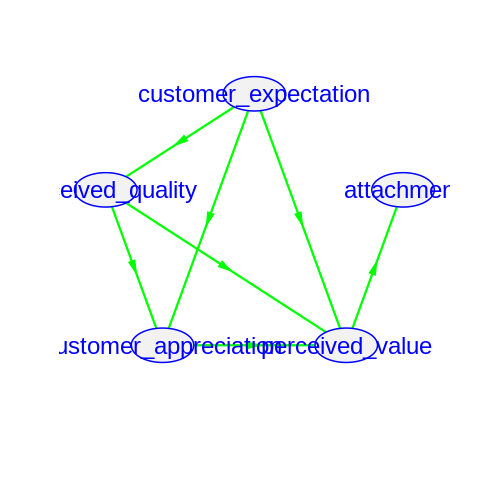

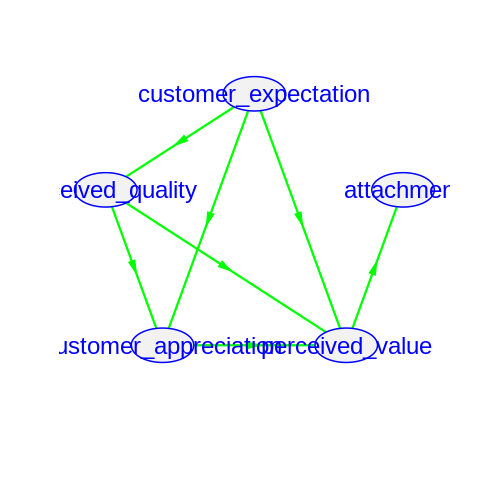

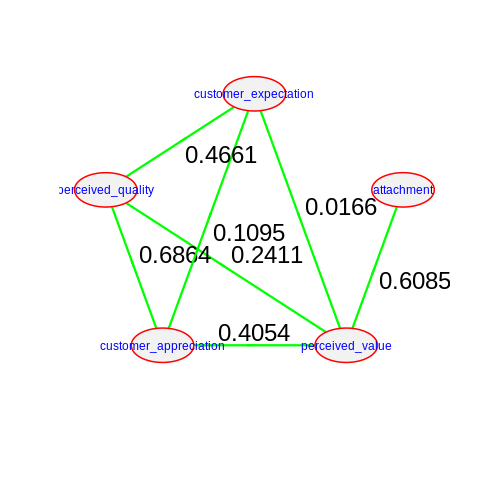

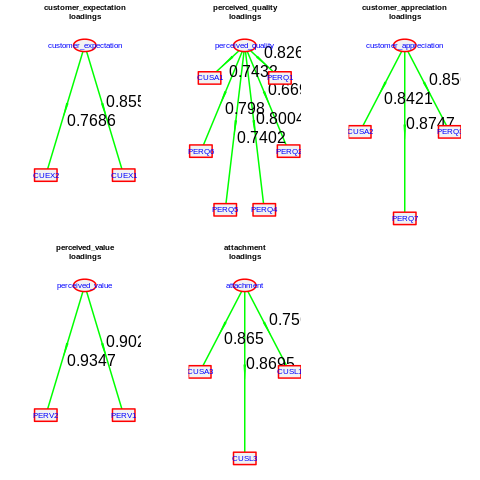

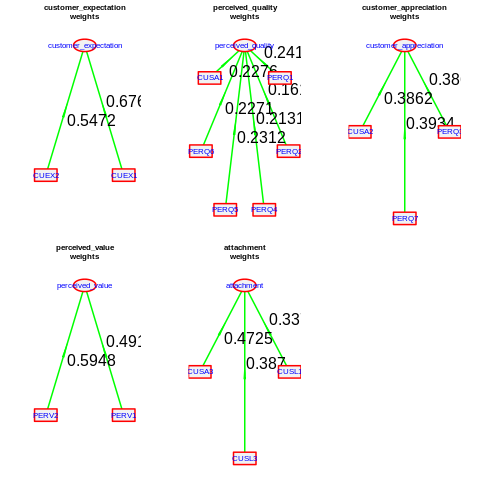

In [0]:
 %%R

# path matrix
customer_expectation = c(0,0,0,0,0)
perceived_quality = c(1,0,0,0,0)
customer_appreciation = c(1,1,0,0,0)
perceived_value = c(1,1,1,0,0)
attachment = c(0,0,0,1,0)

sat_path = rbind(customer_expectation, perceived_quality, customer_appreciation, perceived_value, attachment)

# plot diagram of path matrix
innerplot(sat_path,box.cex=2,txt.col="blue",lcol="blue",colpos="green",colneg="orange")

# plot diagram of path matrix
innerplot(sat_path,box.cex=2,txt.col="blue",lcol="blue",colpos="green",colneg="orange")

# blocks of outer model
sat_blocks = list(1:2, 3:8, 9:11, 12:13, 14:16)

# vector of modes (reflective indicators)
sat_mod = rep("A", 5)

# apply plspm
satpls_libre = plspm(df1, sat_path, sat_blocks, modes = sat_mod, scaled = FALSE)
satpls_libre  = plspm(df1, sat_path, sat_blocks, modes = sat_mod, scaled = TRUE)
satpls_libre  = plspm(df1, sat_path, sat_blocks, modes = sat_mod, scaled = TRUE, boot.val=TRUE, br=100)

# plot diagram of the inner model
innerplot(satpls_libre,box.cex=1,txt.col="blue", arr.width=0.05,lcol="red",colpos="green",colneg="orange",cex.txt=2)

# plot loadings
outerplot(satpls_libre,box.size=0.1,box.cex=1, arr.width=0.05,txt.col="blue",lcol="red",colpos="green",colneg="orange",cex.txt=2,what = "loadings")

# plot outer weights
outerplot(satpls_libre,box.size=0.1,box.cex=1, arr.width=0.05,txt.col="blue",lcol="red",colpos="green",colneg="orange",cex.txt=2,what = "weights")

In [0]:
%%R
summary(satpls_libre)

PARTIAL LEAST SQUARES PATH MODELING (PLS-PM) 

---------------------------------------------------------- 
MODEL SPECIFICATION 
1   Number of Cases      250 
2   Latent Variables     5 
3   Manifest Variables   16 
4   Scale of Data        Standardized Data 
5   Non-Metric PLS       FALSE 
6   Weighting Scheme     centroid 
7   Tolerance Crit       1e-06 
8   Max Num Iters        100 
9   Convergence Iters    3 
10  Bootstrapping        TRUE 
11  Bootstrap samples    100 

---------------------------------------------------------- 
BLOCKS DEFINITION 
                    Block         Type   Size   Mode
1    customer_expectation    Exogenous      2      A
2       perceived_quality   Endogenous      6      A
3   customer_appreciation   Endogenous      3      A
4         perceived_value   Endogenous      2      A
5              attachment   Endogenous      3      A

---------------------------------------------------------- 
BLOCKS UNIDIMENSIONALITY 
                       Mode  MVs  C.al

##### **RFPC modèle expert**

In [0]:
%%R

rfpc = function(data, begin,end)
    {n = nrow(df1)
    bloc_ <- as.matrix(data.frame(df1[,begin:end]))
    qbloc = ncol(bloc_)
    bloc_std <- matrix(0, nrow=n, ncol=qbloc)
    
    for (j in 1:qbloc)
    {X_bis <- as.matrix(data.frame(bloc_[,j]))
    bloc_std[,j] <- (X_bis-apply(X_bis,2,mean,na.rm=TRUE))/apply(X_bis,2,sd,na.rm=TRUE)
    }
    
    cor_ <- cor(bloc_)
    pca_ <- eigen(cor_)
    
    res.pca <- prcomp(bloc_, scale = TRUE)
    var_ <- get_pca_var(res.pca)
    print("les loadings:")
    loadings = var_$cor[,1]
    print(loadings)
    
    print("les weights:")
    weigths = loadings / get_eigenvalue(res.pca)[,1][1]
    print(weigths)

    print("les communality:")
    communality = loadings**2
    print(communality)

    v_ <- as.matrix(pca_$vectors)
    bloc_std <- as.matrix(bloc_std)
    z_ <- bloc_std%*%v_[,1]
    ret_ <- list("composante"= -z_, "valeur_propre" = pca_$values[1])
    return (ret_)
    }   


# Calcul des 1 ère CP pour chaque bloc 

customer_expectation = rfpc(df1, 1,2)
perceived_quality = rfpc(df1, 3,8)
customer_appreciation  = rfpc(df1, 9,11)
perceived_value = rfpc(df1, 12,13)
attachment = rfpc(df1,14,16)


R[write to console]: Error in nrow(df1) : object 'df1' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> rfpc -> nrow




Error in nrow(df1) : object 'df1' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible -> rfpc -> nrow


##### **RFPC pour comp2**

In [0]:
%%R  

reg_2 = lm(perceived_quality$composante ~ customer_expectation$composante + -1)
summary(reg_2)


Call:
lm(formula = perceived_quality$composante ~ customer_expectation$composante + 
    -1)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2970 -0.6422  0.1693  1.1623  3.7545 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
customer_expectation$composante  -0.7504     0.0915  -8.201 1.27e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.663 on 249 degrees of freedom
Multiple R-squared:  0.2127,	Adjusted R-squared:  0.2095 
F-statistic: 67.26 on 1 and 249 DF,  p-value: 1.271e-14



##### **RFPC pour comp3**

In [0]:
%%R 

reg_3 = lm(customer_appreciation$composante ~ customer_expectation$composante + perceived_quality$composante + -1) 
summary(reg_3) 


Call:
lm(formula = customer_appreciation$composante ~ customer_expectation$composante + 
    perceived_quality$composante + -1)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3788 -0.4780 -0.0919  0.4137  3.3842 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
customer_expectation$composante  0.14287    0.06221   2.297   0.0225 *  
perceived_quality$composante    -0.54002    0.03823 -14.125   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.003 on 248 degrees of freedom
Multiple R-squared:  0.5459,	Adjusted R-squared:  0.5422 
F-statistic: 149.1 on 2 and 248 DF,  p-value: < 2.2e-16



##### **RFPC pour comp4**

In [0]:
%%R  

reg_4 = lm(perceived_value$composante ~ customer_appreciation$composante + perceived_quality$composante + customer_expectation$composante + -1)
summary(reg_4)

UsageError: Cell magic `%%R` not found.


##### **RFPC pour comp5**

In [0]:
%%R  

reg_5 = lm(attachment$composante ~ perceived_value$composante + -1)
summary(reg_5)


Call:
lm(formula = attachment$composante ~ perceived_value$composante + 
    -1)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8806 -0.6940 -0.1654  0.5361  4.3075 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
perceived_value$composante  0.65859    0.05658   11.64   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.161 on 249 degrees of freedom
Multiple R-squared:  0.3524,	Adjusted R-squared:  0.3498 
F-statistic: 135.5 on 1 and 249 DF,  p-value: < 2.2e-16

